In [46]:
import pandas as pd
import numpy as np
df= pd.read_csv("C:\\data science class\\assignments\\Recommendation System\\anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


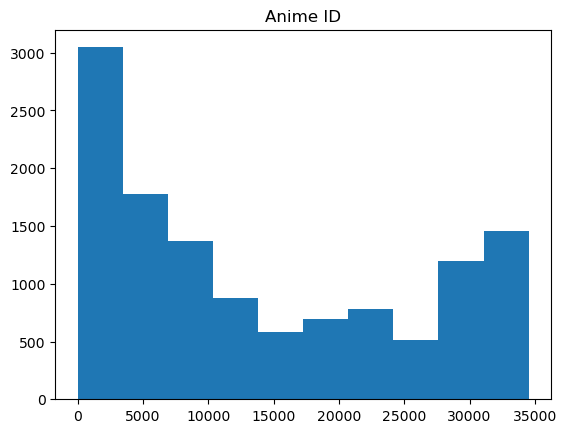

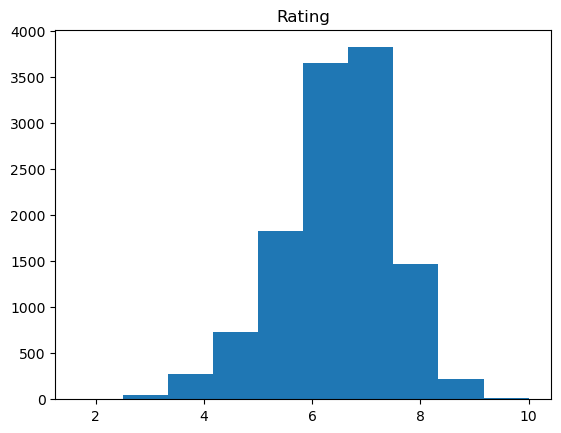

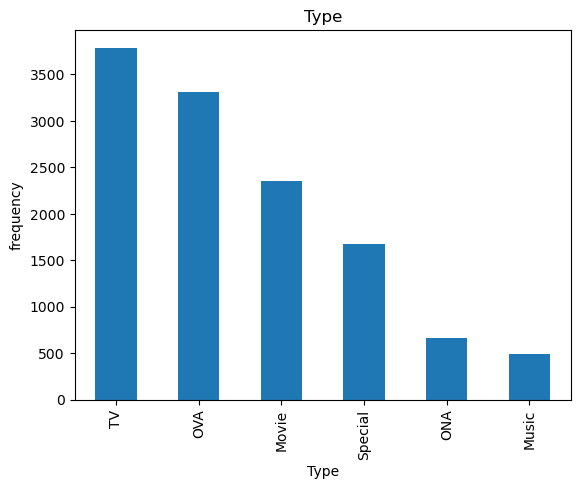

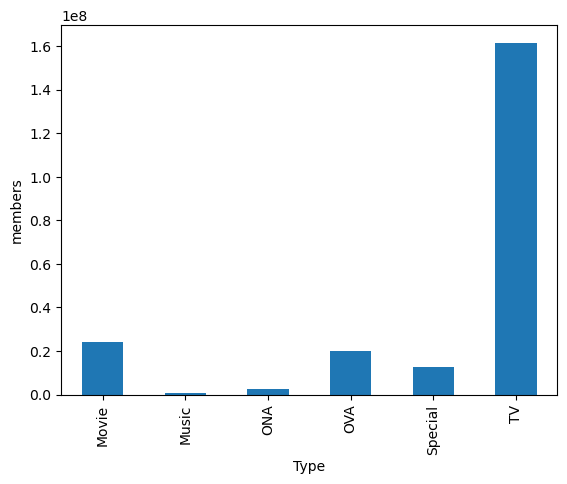

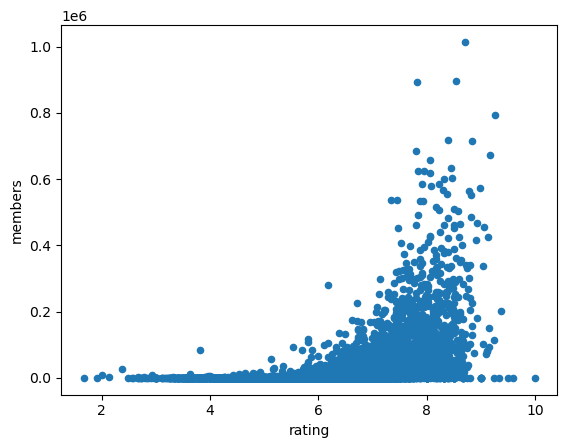

In [48]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['anime_id'])
plt.title('Anime ID')
plt.show()

plt.hist(df['rating'])
plt.title('Rating')
plt.show()

count= df['type'].value_counts()
count.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("frequency")
plt.title('Type')
plt.show()

cnt = df.groupby("type")['members'].sum()
cnt.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("members")
plt.show()

df.plot(kind='scatter', x='rating' ,y='members')
plt.show()

In [49]:
df.isnull().sum()
df['rating']=df['rating'].fillna(df['rating'].mean()) # missing rating is replace with mean of that column

df['type']=df['type'].fillna(df['type'].mode()[0]) # missing type is replace with mode of that column

df.isnull().sum()                    

anime_id     0
name         0
genre       62
type         0
episodes     0
rating       0
members      0
dtype: int64

In [50]:
# The features to be used for computing similarity will depend on the specific type of similarity you want to compute.
# Let's consider using the 'genre', 'type', 'rating', and 'members' features for similarity.
features = df[['genre', 'type', 'rating', 'members']]
features

,genre,type,rating,members
0,"Drama, Romance, School, Supernatural",Movie,9.37,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262
3,"Sci-Fi, Thriller",TV,9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266
...,...,...,...,...
12289,Hentai,OVA,4.15,211
12290,Hentai,OVA,4.28,183
12291,Hentai,OVA,4.88,219
12292,Hentai,OVA,4.98,175


In [51]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
OHE = OneHotEncoder()
MM= MinMaxScaler()

numerical_features=features[['rating', 'members']]
MM = MM.fit_transform(numerical_features)
MM = pd.DataFrame(MM, columns=['rating', 'members'])
MM

#In sheet genre contain more than 1 genre so we need to sepaerate it first by , 
genres = df['genre'].str.get_dummies(sep = ',')
genres.columns # we can see all genres

OHE1= OHE.fit_transform(features[['type']]).toarray()
OHE1= pd.DataFrame(OHE1)
col=OHE.get_feature_names_out(['type']) # this line will give you all strings contain in column in alphabetically order
OHE1.columns=col
OHE1


#After transformation add all table into one table
df_final = pd.concat([genres,OHE1,MM], axis=1)
df_final

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.924370,0.197872
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.911164,0.782770
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.909964,0.112689
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.900360,0.664325
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.899160,0.149186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.297719,0.000203
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.313325,0.000176
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.385354,0.000211
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.397359,0.000168


In [55]:
#depend upon customer enter title  recommend him other same genres type show  by using cosine similarity 

from sklearn.metrics.pairwise import cosine_similarity

anime_title='BleAch'

print("anime title:", anime_title)
#even input anime is in data but due to lower and upper case mismatch, we dont get result 
anime_title = anime_title.lower()
df['name']=df['name'].str.lower()
anime_index = df[df['name'] == anime_title].index # find the input title index
#if enter title is not in sheet then,
if len(anime_index) == 0:
    print('Anime: ',anime_title,' not found in the dataset.')
else:
    anime_index = anime_index[0]
print("anime index:", anime_index)

similarity_scores = cosine_similarity([df_final.iloc[anime_index]], df_final) #find the similarity score for every title 
similarity_scores = similarity_scores[0]

anime_scores = list(enumerate(similarity_scores)) #enumerate() is used to give counter
len(anime_scores)

def get_second_element(x):
    return x[1]
#above function is used to sort the data depend on 2nd value of list, not on index
sorted_anime_scores = sorted(anime_scores, key = get_second_element, reverse=True)
sorted_anime_scores

#create top indx list and add top 10 number of score in that list with its index 
top_index = [index for index, score in sorted_anime_scores [:10]]
top_index

recommended_anime = df.iloc[top_index] 
recommended_anime

anime title: BleAch
anime index: 582


,anime_id,name,genre,type,episodes,rating,members
582,269,bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055
175,1604,katekyo hitman reborn!,"Action, Comedy, Shounen, Super Power",TV,203,8.37,258103
3288,11703,code:breaker,"Action, Comedy, School, Shounen, Super Power, ...",TV,13,7.03,135255
1271,18497,yozakura quartet: hana no uta,"Action, Comedy, Magic, Shounen, Super Power, S...",TV,13,7.61,58245
4785,21353,tokyo esp,"Action, Comedy, Sci-Fi, Shounen, Super Power, ...",TV,12,6.64,95168
3543,4548,yozakura quartet,"Action, Comedy, Magic, Shounen, Super Power, S...",TV,12,6.96,68023
1696,4038,zettai karen children,"Action, Comedy, Shounen, Supernatural",TV,51,7.47,25876
841,20,naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
995,132,getbackers,"Action, Comedy, Drama, Mystery, Shounen, Super...",TV,49,7.73,73536
615,1735,naruto: shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578


In [75]:
# as per question we have to convert above code into function so when ever we call it can give output
anime_title='bleach'
#anime_title=input("Enter Anime Name: " )

def recommended_anime(anime_title):

    #even input anime is in data but due to lower and upper case mismatch, we dont get result 
    anime_title = anime_title.strip().lower()
    df['name']=df['name'].str.lower()
    
    anime_index = df[df['name'] == anime_title].index # find the input title index
    #if enter title is not in sheet then,
    if len(anime_index) == 0:
        print('Anime: ',anime_title,'is not found in the dataset.')
        return None
    anime_index = anime_index[0]
    print("anime index:", anime_index)
    print("anime title:", anime_title)

    similarity_scores = cosine_similarity([df_final.iloc[anime_index]], df_final) #find the similarity score for every title 
    similarity_scores = similarity_scores[0]

    anime_scores = list(enumerate(similarity_scores)) #enumerate() is used to give counter
    len(anime_scores)
    
    def get_second_element(x):
        return x[1]
    #above function is used to sort the data depend on 2nd value of list, not on index
    sorted_anime_scores = sorted(anime_scores, key = get_second_element, reverse=True)
    sorted_anime_scores

    #create top indx list and add top 10 number of score in that list with its index 
    top_index = [index for index, score in sorted_anime_scores [:10]]
    top_index

    recommended_animes = df.iloc[top_index] 
    print(recommended_animes)
recommended_anime(anime_title)

anime index: 582
anime title: bleach
      anime_id                           name  \
582        269                         bleach   
175       1604         katekyo hitman reborn!   
3288     11703                   code:breaker   
1271     18497  yozakura quartet: hana no uta   
4785     21353                      tokyo esp   
3543      4548               yozakura quartet   
1696      4038          zettai karen children   
841         20                         naruto   
995        132                     getbackers   
615       1735             naruto: shippuuden   

                                                  genre type episodes  rating  \
582   Action, Comedy, Shounen, Super Power, Supernat...   TV      366    7.95   
175                Action, Comedy, Shounen, Super Power   TV      203    8.37   
3288  Action, Comedy, School, Shounen, Super Power, ...   TV       13    7.03   
1271  Action, Comedy, Magic, Shounen, Super Power, S...   TV       13    7.61   
4785  Action, Come

In [125]:
#Evaluation   Precision, recall, F1-score

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

all_precision = []
all_recall = []
all_f1 = []

similar_anime = {
    'Naruto': ['Bleach', 'One Piece', 'Fairy Tail', 'Hunter x Hunter (2011)', 'Dragon Ball Z'],
    'Attack on Titan': ['Tokyo Ghoul', 'Fullmetal Alchemist: Brotherhood', 'Death Note', 'One Punch Man', 'Koutetsujou no Kabaneri'],
    'My Hero Academia': ['One Punch Man', 'Haikyuu!!', 'Black Clover', 'Assassination Classroom', 'Jujutsu Kaisen'],
    'bleach':['tokyo esp','naruto: shippuuden','getbackers','Attack']
}

test_anime_titles = ['Naruto', 'Attack on Titan', 'My Hero Academia','bleach']

for anime_title in test_anime_titles:
    recommendations =recommended_anime(anime_title)
    
    if recommendations is None:
      continue
    
    recommended_names = set(recommendations['name'].tolist())
    names = set(similar_anime.get(anime_title, []))

    tp = len(recommended_names.intersection(names))
    fp = len(recommended_names.difference(names))
    fn = len(names.difference(recommended_names))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)

avg_precision = np.mean(all_precision) if all_precision else 0
avg_recall = np.mean(all_recall) if all_recall else 0
avg_f1 = np.mean(all_f1) if all_f1 else 0
print("----------------------------------------------------------------------------------")
print("Precision: ",avg_precision)
print("Recall: ",avg_recall)
print("F1 Score: ",avg_f1)

anime index: 841
anime title: naruto
      anime_id                    name  \
841         20                  naruto   
615       1735      naruto: shippuuden   
175       1604  katekyo hitman reborn!   
206        813           dragon ball z   
582        269                  bleach   
588       6033         dragon ball kai   
1930     30694       dragon ball super   
2615     11761              medaka box   
3038       174            tenjou tenge   
1209     14527     medaka box abnormal   

                                                  genre type episodes  rating  \
841   Action, Comedy, Martial Arts, Shounen, Super P...   TV      220    7.81   
615   Action, Comedy, Martial Arts, Shounen, Super P...   TV  Unknown    7.94   
175                Action, Comedy, Shounen, Super Power   TV      203    8.37   
206   Action, Adventure, Comedy, Fantasy, Martial Ar...   TV      291    8.32   
582   Action, Comedy, Shounen, Super Power, Supernat...   TV      366    7.95   
588   Action, 

In [ ]:
1. Can you explain the difference between user-based and item-based collaborative filtering?
user based collaborative filtering
Find similar users to the target user and recommend items those similar users liked.
Compare the target user with all other users using similarity metrics -cosine similarity.
Identify users with similar tastes.
Recommend items that those similar users liked

item based collaborative filrtering
-Recommend items similar to what the user already likes
-Measure similarity between items based on user ratings.
-For each item the user has liked, find similar items.
-Recommend those similar items

2.What is collaborative filtering, and how does it work?
  collaborative filteringis a popular recommender system technique used to predict what a user will like based on their past preferences and 
the preferences of similar users
  If two users liked similar items in the past, they will likely like similar items in the future.
 there are mainly two types 
1.user based collaborative filtering
2. item based collaborative filtering
